# Фреймворк H2O

Фреймворк H20 поддерживает автоматизацию машинного обучения [AutoML](https://h2o.ai/platform/h2o-automl/), как в программном интерфейсе для R и Python, так и в web-GUI.

Видео по материалам: https://www.youtube.com/watch?v=91QljBnvM7s

In [ ]:
# Для мониторинга GPU
!nvidia-smi

Thu May  9 11:01:11 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
%%capture
# установка и Runtime библиотеки Java
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  default-jre-headless fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libfontenc1 libxkbfile1 libxtst6 libxxf86dga1 openjdk-11-jre x11-utils
Suggested packages:
  mesa-utils
The following NEW packages will be installed:
  default-jre default-jre-headless fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libfontenc1 libxkbfile1 libxtst6 libxxf86dga1 openjdk-11-jre x11-utils
0 upgraded, 12 newly installed, 0 to remove and 45 not upgraded.
Need to get 3,720 kB of archives.
After this operation, 12.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 default-jre-headless amd64 2:1.11-72build2 [3,042 B]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxtst6 amd64 2:1.2.3-1build4 [13.4 kB]
Get:3 http://archive.ubuntu.com

In [ ]:
# установим фреймворк
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 MB 5.5 MB/s eta 0:00:00


In [ ]:
 # подключим
 import h2o

Командой [`init()`](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/starting-h2o.html#from-python) создается и подключается (здесь локальный) сервер.  

In [ ]:
# инициализируем
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp4lgtql81
  JVM stdout: /tmp/tmp4lgtql81/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp4lgtql81/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,1 month and 25 days
H2O_cluster_name:,H2O_from_python_unknownUser_krke76
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


[H2OAutoML](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html) позволяет автоматизировать перебор моделей и их гиперпараметров.

In [ ]:
from h2o.automl import H2OAutoML # подключим

In [ ]:
# данные для обучения
churn_df = h2o.import_file('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
# столбцы
churn_df.types

{'customerID': 'string',
 'gender': 'enum',
 'SeniorCitizen': 'int',
 'Partner': 'enum',
 'Dependents': 'enum',
 'tenure': 'int',
 'PhoneService': 'enum',
 'MultipleLines': 'enum',
 'InternetService': 'enum',
 'OnlineSecurity': 'enum',
 'OnlineBackup': 'enum',
 'DeviceProtection': 'enum',
 'TechSupport': 'enum',
 'StreamingTV': 'enum',
 'StreamingMovies': 'enum',
 'Contract': 'enum',
 'PaperlessBilling': 'enum',
 'PaymentMethod': 'enum',
 'MonthlyCharges': 'real',
 'TotalCharges': 'real',
 'Churn': 'enum'}

In [ ]:
# статистика
churn_df.describe()

Rows:7043
Cols:21

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
type,string,enum,int,enum,enum,int,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,real,real,enum
mins,NaN,,0.0,,,0.0,,,,,,,,,,,,,18.25,18.8,
mean,NaN,,0.1621468124378816,,,32.37114865824223,,,,,,,,,,,,,64.76169246059916,2283.300440841865,
maxs,NaN,,1.0,,,72.0,,,,,,,,,,,,,118.75,8684.8,
sigma,NaN,,0.3686116056100131,,,24.559481023094456,,,,,,,,,,,,,30.090047097678482,2266.771361883145,
zeros,0,,5901,,,11,,,,,,,,,,,,,0,0,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [ ]:
churn_train,churn_test,churn_valid = churn_df.split_frame(ratios=[.7, .15]) # разделяем на обучение, тест и проверку

In [ ]:
churn_train

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes
1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.1,1949.4,No
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.8,3046.05,Yes
6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No
9763-GRSKD,Male,0,Yes,Yes,13,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No
7469-LKBCI,Male,0,No,No,16,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.8,No


In [ ]:
y = "Churn" # целевой столбец
x = churn_df.columns # входные признаки
x.remove(y) # целевой удаляем
x.remove("customerID") # этот тоже лишний так как не несет полезной информации

Будут обучаться разные модели и подбираться их настройки.

Доступны алгоритмы:
* деревья решений,
* обобщенные линейные модели, включая регуляризацию,
* модели градиентного бустинга
* персептроны
* ансамбли перечисленных


In [ ]:
# создаем модел(и)
aml = H2OAutoML(max_models = 10, # максимальное число моделей
                seed = 10,
                exclude_algos = ["StackedEnsemble", "DeepLearning"], # какие не использовать
                verbosity="info",
                nfolds=0) # кросвалидацию отключим, так как есть отдельная выборка


In [ ]:
# проверим GPU
!nvidia-smi

Thu May  9 11:01:56 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# запускаем обучение моделей
aml.train(x = x, y = y, training_frame = churn_train, validation_frame=churn_valid)

AutoML progress: |
11:01:56.373: Project: AutoML_1_20240509_110156
11:01:56.376: Cross-validation disabled by user: no fold column nor nfolds > 1.
11:01:56.376: Setting stopping tolerance adaptively based on the training frame: 0.014278431229270644
11:01:56.379: Build control seed: 10
11:01:56.383: training frame: Frame key: AutoML_1_20240509_110156_training_py_2_sid_857c    cols: 21    rows: 4905  chunks: 8    size: 265460  checksum: 4541110422585820582
11:01:56.383: validation frame: Frame key: py_4_sid_857c    cols: 21    rows: 1061  chunks: 8    size: 139099  checksum: -690572375108528783
11:01:56.383: leaderboard frame: Frame key: py_4_sid_857c    cols: 21    rows: 1061  chunks: 8    size: 139099  checksum: -690572375108528783
11:01:56.383: blending frame: NULL
11:01:56.384: response column: Churn
11:01:56.384: fold column: null
11:01:56.384: weights column: null
11:01:56.414: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w)

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_1_AutoML_1_20240509_110156


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    45                 45                          19157                  6            12           8.75555       27            31            29.1556

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.11874910357141831
RMSE: 0.344599918124509
LogLoss: 0.3685969106842198
Mean Per-Class Error: 0.1972735891961058
AUC: 0.8860790147818691
AUCPR: 0.7305472222661606
Gini: 0.7721580295637382

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3093733026044185
       No    Yes    Error    Rate
-----  ----  -----  -------  --------------
No     2916  696    0.1927   (696.0/3612.0)
Yes    261   1032   0.2019   (261.0/1293.0)
Total  3177  1728   0.1951   (957.0/4905.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.309373     0.683217  219
max f2                       0.138501     0.785224  303
max f0point5                 0.549142     0.68215   123
max accuracy                 0.419688     0.824873  172
max precision                0.910083     1         0
max recall                   0.0174628    1         388
max specificity              0.910083     1         0
max absolute_mcc             0.309373     0.558435  219
max min_per_class_accuracy   0.304771     0.802049  222
max mean_per_class_accuracy  0.268707     0.8063    239
max tns                      0.910083     3612      0
max fns                      0.910083     1292      0
max fps                      0.00756905   3612      399
max tps                      0.0174628    1293      388
max tnr                      0.910083     1         0
max fnr                      0.910083     0.999227  0
max fpr                      0.00756905   1         399
max tpr                      0.0174628    1         388

Gains/Lift Table: Avg response rate: 26.36 %, avg score: 26.30 %
group    cumulative_data_fraction    lower_threshold    lift        cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ----------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0101937                   0.855424           3.64176     3.64176            0.96             0.87437    0.96                        0.87437             0.037123        0.037123                   264.176   264.176            0.0365693
2        0.0201835                   0.834044           3.48383     3.56359            0.918367         0.846377   0.939394                    0.860515            0.0348028       0.0719258                  248.383   256.359            0.0702646
3        0.0301733                   0.809245           3.17416     3.43466            0.836735         0.822597   0.905405                    0.847961            0.0317092       0.103635                   217.416   243.466            0.099759
4        0.0417941                   0.790295           3.46074     3.44191            0.912281         0.798999   0.907317                    0.834347            0.0402166       0.143852                   246.074   244.191            0.138591
5        0.0501529                   0.768713           3.33088     3.42341            0.878049         0.778997   0.902439         

Проанализируйте вывод выше. Какие метрики измерялись? Какие результаты получились?

In [ ]:
!nvidia-smi

Thu May  9 11:02:25 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P0              28W /  70W |    177MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# результаты (отсортированы)
lb = aml.leaderboard

In [ ]:
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_1_AutoML_1_20240509_110156,0.854081,0.414258,0.689967,0.221308,0.367046,0.134723
GLM_1_AutoML_1_20240509_110156,0.85185,0.419101,0.680048,0.211898,0.368585,0.135855
GBM_2_AutoML_1_20240509_110156,0.845941,0.42419,0.674645,0.236446,0.372179,0.138517
XRT_1_AutoML_1_20240509_110156,0.844968,0.426634,0.672671,0.229585,0.371606,0.138091
GBM_3_AutoML_1_20240509_110156,0.841036,0.432019,0.662519,0.237069,0.375789,0.141218
XGBoost_3_AutoML_1_20240509_110156,0.840544,0.432583,0.667186,0.241718,0.375314,0.140861
XGBoost_1_AutoML_1_20240509_110156,0.837788,0.436521,0.643034,0.242681,0.37839,0.143179
GBM_4_AutoML_1_20240509_110156,0.833814,0.445447,0.657311,0.252319,0.380049,0.144437
DRF_1_AutoML_1_20240509_110156,0.827943,0.474542,0.633548,0.239789,0.379997,0.144397
XGBoost_2_AutoML_1_20240509_110156,0.823983,0.456712,0.645222,0.248038,0.384978,0.148208


In [ ]:
# используем "лучшую" модель для теста
churn_pred=aml.leader.predict(churn_test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [ ]:
churn_pred.head()

predict,No,Yes
No,0.96273,0.0372698
Yes,0.149575,0.850425
Yes,0.740422,0.259578
No,0.921015,0.0789855
No,0.902822,0.0971775
No,0.975993,0.0240072
Yes,0.250515,0.749485
No,0.95975,0.0402496
No,0.951595,0.048405
Yes,0.358228,0.641772


In [ ]:
# и оценки метрик на тесте
aml.leader.model_performance(churn_test)

ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.13157074051640047
RMSE: 0.36272681251377115
LogLoss: 0.4078155308566816
Mean Per-Class Error: 0.2157500334537669
AUC: 0.8517217538694858
AUCPR: 0.6706255394558661
Gini: 0.7034435077389716

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.20443202331264249
       No    Yes    Error    Rate
-----  ----  -----  -------  --------------
No     576   219    0.2755   (219.0/795.0)
Yes    44    238    0.156    (44.0/282.0)
Total  620   457    0.2442   (263.0/1077.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.204432     0.644114  242
max f2                       0.136058     0.760805  283
max f0point5                 0.418274     0.6458    147
max accuracy                 0.418274     0.81337   147
max precision                0.908842     1         0
max recall                   0.0115405    1         394
max specificity              0.908842     1         0
max absolute_mcc             0.204432     0.50569   242
max min_per_class_accuracy   0.260554     0.765957  215
max mean_per_class_accuracy  0.204432     0.78425   242
max tns                      0.908842     795       0
max fns                      0.908842     281       0
max fps                      0.00735544   795       399
max tps                      0.0115405    282       394
max tnr                      0.908842     1         0
max fnr                      0.908842     0.996454  0
max fpr                      0.00735544   1         399
max tpr                      0.0115405    1         394

Gains/Lift Table: Avg response rate: 26.18 %, avg score: 24.15 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0102136                   0.84574            3.47195   3.47195            0.909091         0.876156   0.909091                    0.876156            0.035461        0.035461                   247.195   247.195            0.0342031
2        0.0204271                   0.814789           3.47195   3.47195            0.909091         0.834759   0.909091                    0.855458            0.035461        0.070922                   247.195   247.195            0.0684063
3        0.0306407                   0.787828           2.77756   3.24049            0.727273         0.802978   0.848485                    0.837964            0.0283688       0.0992908                  177.756   224.049            0.0930015
4        0.0408542                   0.755774           3.12476   3.21156            0.818182         0.767668   0.840909                    0.82039             0.0319149       0.131206                   212.476   221.156            0.122401
5        0.0501393                   0.738801           3.05532   3.18262            0.8              0.747402   0.833333                    0.806874            0.0283688       0.159574                   205.532   218.262            0.148254
6        0.100279                    0.628282           2.829     3.00581            0.740741         0.685688   0.787037                    0.746281            0.141844        0.301418                   182.9     200.581            0.272488
7        0.150418                    0.542579           2.2632    2.75827            0.592593         0.591569   0.722222                    0.69471             0.113475        0.414894                   126.32    175.827            0.35829
8        0.200557        

In [ ]:
# список моделей
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
#se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
#metalearner = h2o.get_model(se.metalearner()['name'])

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [ ]:
model_ids

['GBM_1_AutoML_1_20240509_110156',
 'GLM_1_AutoML_1_20240509_110156',
 'GBM_2_AutoML_1_20240509_110156',
 'XRT_1_AutoML_1_20240509_110156',
 'GBM_3_AutoML_1_20240509_110156',
 'XGBoost_3_AutoML_1_20240509_110156',
 'XGBoost_1_AutoML_1_20240509_110156',
 'GBM_4_AutoML_1_20240509_110156',
 'DRF_1_AutoML_1_20240509_110156',
 'XGBoost_2_AutoML_1_20240509_110156']

In [ ]:
# информация о любой модели
h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_3_AutoML_1_20240509_110156


Model Summary: 
    number_of_trees
--  -----------------
    35

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.10669146809491317
RMSE: 0.3266365994418157
LogLoss: 0.33427311787956027
Mean Per-Class Error: 0.1678200147484667
AUC: 0.9097765547341978
AUCPR: 0.7837335844374645
Gini: 0.8195531094683957

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3307775900914119
       No    Yes    Error    Rate
-----  ----  -----  -------  --------------
No     3031  581    0.1609   (581.0/3612.0)
Yes    226   1067   0.1748   (226.0/1293.0)
Total  3257  1648   0.1645   (807.0/4905.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.330778     0.725604  213
max f2                       0.237468     0.808437  255
max f0point5                 0.59082      0.727969  112
max accuracy                 0.449627     0.842406  166
max precision                0.958898     1         0
max recall                   0.0125929    1         387
max specificity              0.958898     1         0
max absolute_mcc             0.330778     0.619711  213
max min_per_class_accuracy   0.318579     0.831672  217
max mean_per_class_accuracy  0.27557      0.837267  236
max tns                      0.958898     3612      0
max fns                      0.958898     1292      0
max fps                      0.00222682   3612      399
max tps                      0.0125929    1293      387
max tnr                      0.958898     1         0
max fnr                      0.958898     0.999227  0
max fpr                      0.00222682   1         399
max tpr                      0.0125929    1         387

Gains/Lift Table: Avg response rate: 26.36 %, avg score: 26.28 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0101937                   0.899549           3.7935     3.7935             1                0.924146    1                           0.924146            0.0386698       0.0386698                  279.35    279.35             0.0386698
2        0.0201835                   0.873491           3.71609    3.75519            0.979592         0.886862    0.989899                    0.905692            0.037123        0.0757927                  271.609   275.519            0.0755159
3        0.0301733                   0.853709           3.63867    3.71661            0.959184         0.864977    0.97973                     0.892212            0.0363496       0.112142                   263.867   271.661            0.111312
4        0.0401631                   0.828846           3.25157    3.60094            0.857143         0.843685    0.949239                    0.880142            0.0324826       0.144625                   225.157   260.094            0.141856
5        0.0501529                   0.797803           3.32899    3.54677            0.877551         0.813631    0.934959                    0.866894            0.033256        0.177881                   232.899   254.677            0.173451
6        0.100102                    0.688726           3.1277     3.33766            0.82449          0.739043    0.879837                    0.803099            0.156226        0.334107                   212.77    233.766            0.317772
7        0.150051                    0.601197           2.77158    3.149

In [ ]:
out = h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

In [ ]:
# параметры модели
out.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'XGBoost_3_AutoML_1_20240509_110156',
   'type': 'Key<Model>',
   'URL': '/3/Models/XGBoost_3_AutoML_1_20240509_110156'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20240509_110156_training_py_2_sid_857c',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20240509_110156_training_py_2_sid_857c'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20240509_110156_training_py_2_sid_857c',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20240509_110156_training_py_2_sid_857c'}},
 'validation_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schem

In [ ]:
# поддерживаются модели XGBoost, можно конвертировать в них
out.convert_H2OXGBoostParams_2_XGBoostParams()

({'silent': True,
  'eta': 0.3,
  'colsample_bylevel': 0.8,
  'objective': 'binary:logistic',
  'min_child_weight': 3.0,
  'nthread': 2,
  'seed': 18,
  'max_bin': 256,
  'max_depth': 5,
  'colsample_bytree': 0.8,
  'lambda': 1.0,
  'gamma': 0.0,
  'gpu_id': 0,
  'alpha': 0.0,
  'booster': 'gbtree',
  'grow_policy': 'depthwise',
  'nround': 10000,
  'subsample': 0.8,
  'max_delta_step': 0.0,
  'tree_method': 'gpu_hist'},
 35)

In [ ]:
out

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_3_AutoML_1_20240509_110156


Model Summary: 
    number_of_trees
--  -----------------
    35

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.10669146809491317
RMSE: 0.3266365994418157
LogLoss: 0.33427311787956027
Mean Per-Class Error: 0.1678200147484667
AUC: 0.9097765547341978
AUCPR: 0.7837335844374645
Gini: 0.8195531094683957

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3307775900914119
       No    Yes    Error    Rate
-----  ----  -----  -------  --------------
No     3031  581    0.1609   (581.0/3612.0)
Yes    226   1067   0.1748   (226.0/1293.0)
Total  3257  1648   0.1645   (807.0/4905.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.330778     0.725604  213
max f2                       0.237468     0.808437  255
max f0point5                 0.59082      0.727969  112
max accuracy                 0.449627     0.842406  166
max precision                0.958898     1         0
max recall                   0.0125929    1         387
max specificity              0.958898     1         0
max absolute_mcc             0.330778     0.619711  213
max min_per_class_accuracy   0.318579     0.831672  217
max mean_per_class_accuracy  0.27557      0.837267  236
max tns                      0.958898     3612      0
max fns                      0.958898     1292      0
max fps                      0.00222682   3612      399
max tps                      0.0125929    1293      387
max tnr                      0.958898     1         0
max fnr                      0.958898     0.999227  0
max fpr                      0.00222682   1         399
max tpr                      0.0125929    1         387

Gains/Lift Table: Avg response rate: 26.36 %, avg score: 26.28 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0101937                   0.899549           3.7935     3.7935             1                0.924146    1                           0.924146            0.0386698       0.0386698                  279.35    279.35             0.0386698
2        0.0201835                   0.873491           3.71609    3.75519            0.979592         0.886862    0.989899                    0.905692            0.037123        0.0757927                  271.609   275.519            0.0755159
3        0.0301733                   0.853709           3.63867    3.71661            0.959184         0.864977    0.97973                     0.892212            0.0363496       0.112142                   263.867   271.661            0.111312
4        0.0401631                   0.828846           3.25157    3.60094            0.857143         0.843685    0.949239                    0.880142            0.0324826       0.144625                   225.157   260.094            0.141856
5        0.0501529                   0.797803           3.32899    3.54677            0.877551         0.813631    0.934959                    0.866894            0.033256        0.177881                   232.899   254.677            0.173451
6        0.100102                    0.688726           3.1277     3.33766            0.82449          0.739043    0.879837                    0.803099            0.156226        0.334107                   212.77    233.766            0.317772
7        0.150051                    0.601197           2.77158    3.149

In [ ]:
out_gbm = h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])

In [ ]:
# матрица потерь (есть практически у всех классификаторов)
out.confusion_matrix()

,No,Yes,Error,Rate
No,3031.0,581.0,0.1609,(581.0/3612.0)
Yes,226.0,1067.0,0.1748,(226.0/1293.0)
Total,3257.0,1648.0,0.1645,(807.0/4905.0)


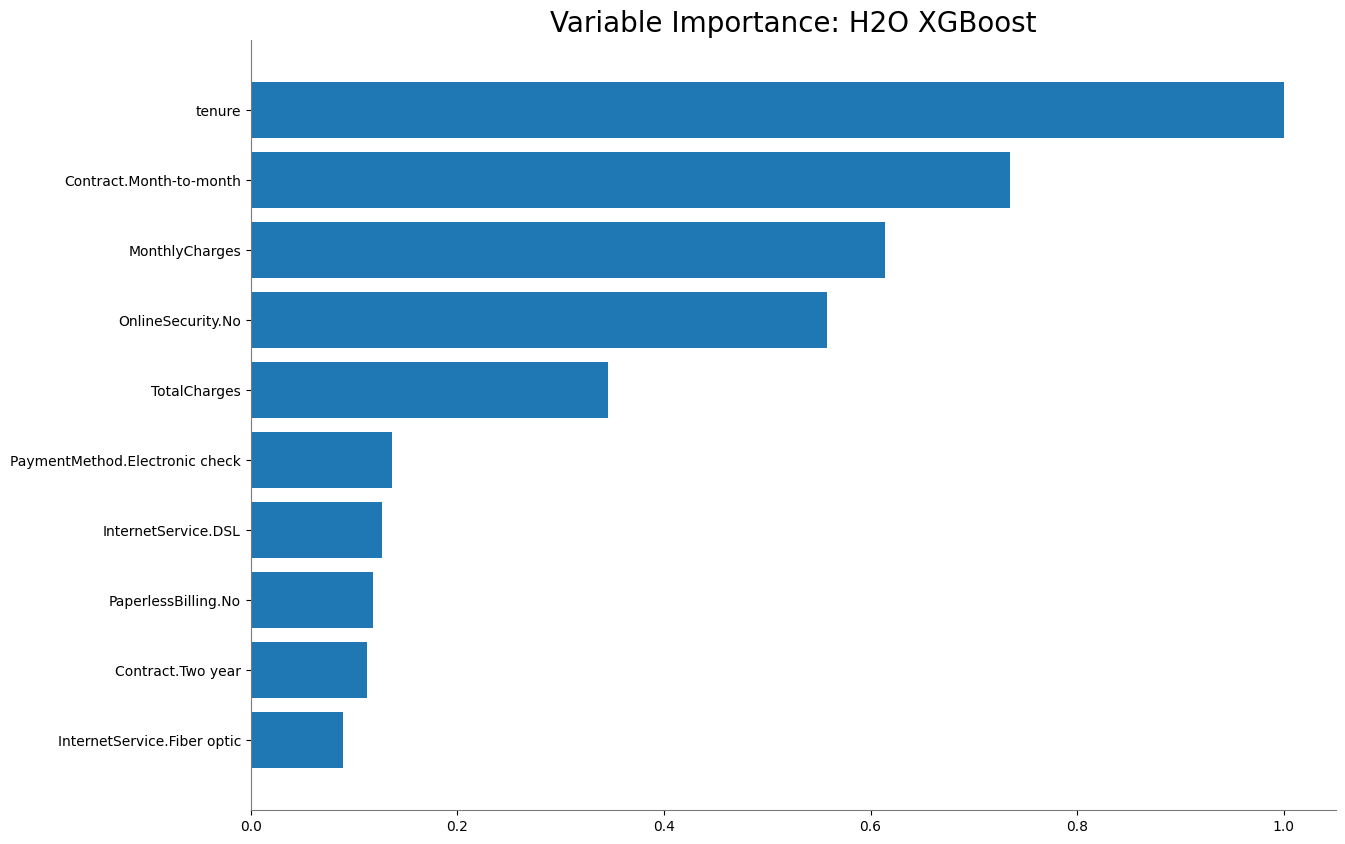

<Figure size 640x480 with 0 Axes>

In [ ]:
# Деревья позволяют оценить важность параметров
out.varimp_plot()

Сохранить модель можно в [MOJO](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/mojo-quickstart.html?highlight=download_mojo) формате.

In [ ]:
aml.leader.download_mojo(path = "./")

'/content/GBM_1_AutoML_1_20240509_110156.zip'

# Задания

* Изучите другие возможности и модели H2O.
* Добавьте в эксперимент модели нейронных сетей.
* Проведите кросс-валидацию с разным числом сегментов и сравните результаты.